# APPLIED DATA SCIENCE CAPSTONE
## Below provided code of Final Capstone Project

In [1]:
# importing of necessary libraries

from bs4 import BeautifulSoup
import requests
import csv
import json
import xml
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
# credentials of Foursquare API

CLIENT_ID = '244G4MXO53XPQZIMF20HH1QB1T2X00TKRXYJNUO3OAVM1J0J' # your Foursquare ID
CLIENT_SECRET = 'LT2TM5FNJ4Y1ZPKNJO2MWO0DP0TXDKM4DTKAYBKRZAT4NR25' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 244G4MXO53XPQZIMF20HH1QB1T2X00TKRXYJNUO3OAVM1J0J
CLIENT_SECRET:LT2TM5FNJ4Y1ZPKNJO2MWO0DP0TXDKM4DTKAYBKRZAT4NR25


In [94]:
# locally reading data

world_cities=pd.read_csv('worldcities.csv')
world_cities.head(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795
5,Shtërpcë,Shterpce,42.2394,21.0272,Kosovo,XK,XKS,Shtërpcë,admin,NaN,1901828239
6,Shtime,Shtime,42.4331,21.0397,Kosovo,XK,XKS,Shtime,admin,NaN,1901598505
7,Vushtrri,Vushtrri,42.8231,20.9675,Kosovo,XK,XKS,Vushtrri,admin,NaN,1901107642
8,Dragash,Dragash,42.0265,20.6533,Kosovo,XK,XKS,Dragash,admin,NaN,1901112530
9,Podujevë,Podujeve,42.9111,21.1899,Kosovo,XK,XKS,Podujevë,admin,NaN,1901550082


In [175]:
# getting only Canada cities

ca_cities=world_cities[world_cities['iso2']=='CA'].reset_index(drop=True)
ca_cities.head(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Selkirk,Selkirk,50.1500,-96.8833,Canada,CA,CAN,Manitoba,NaN,9986.0,1124499880
1,Trepassey,Trepassey,46.7370,-53.3633,Canada,CA,CAN,Newfoundland and Labrador,NaN,398.0,1124344083
2,Schefferville,Schefferville,54.8000,-66.8167,Canada,CA,CAN,Québec,NaN,471.0,1124403382
3,Whitehorse,Whitehorse,60.7167,-135.0500,Canada,CA,CAN,Yukon,admin,23276.0,1124348186
4,Trout River,Trout River,49.4837,-58.1166,Canada,CA,CAN,Newfoundland and Labrador,NaN,452.0,1124733447
5,Yorkton,Yorkton,51.2171,-102.4665,Canada,CA,CAN,Saskatchewan,NaN,15172.0,1124108820
6,Antigonish,Antigonish,45.6269,-61.9982,Canada,CA,CAN,Nova Scotia,NaN,6739.0,1124839247
7,Gander,Gander,48.9500,-54.5500,Canada,CA,CAN,Newfoundland and Labrador,NaN,3345.0,1124310517
8,Berens River,Berens River,52.3666,-97.0333,Canada,CA,CAN,Manitoba,NaN,892.0,1124806860
9,Port-Menier,Port-Menier,49.8226,-64.3480,Canada,CA,CAN,Québec,NaN,263.0,1124109240


In [41]:
# getting necessary columns and checking number of cities

ca_cities_filtered=ca_cities[['city','lat','lng','admin_name','population']]
ca_cities_filtered.shape

(250, 5)

In [29]:
# defining queries for facailities

search_query1 = 'Medical Center'
search_query2 = 'College & University'
search_query3 = 'Food'
search_query4 = 'Shop & Service'
search_query5 = 'Travel & Transport'
radius = 5000

In [81]:
# defining url to check Foursquare API 

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ca_cities_filtered.loc[0]['lat'], ca_cities_filtered.loc[0]['lng'], VERSION, search_query1, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=244G4MXO53XPQZIMF20HH1QB1T2X00TKRXYJNUO3OAVM1J0J&client_secret=LT2TM5FNJ4Y1ZPKNJO2MWO0DP0TXDKM4DTKAYBKRZAT4NR25&ll=50.15,-96.8833&v=20180604&query=Medical Center&radius=5000&limit=50'

In [82]:
# checking Foursquare API availability

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d3fd97ae97dfb002cea07d6'},
 'response': {'venues': [{'id': '50466fc2f2e7efb1bec3d2a8',
    'name': 'Max-Ability Mobility & Home Medical Products',
    'location': {'address': '411 Main St',
     'crossStreet': 'Clandeboye Ave',
     'lat': 50.14549265141466,
     'lng': -96.87197315307904,
     'labeledLatLngs': [{'label': 'display',
       'lat': 50.14549265141466,
       'lng': -96.87197315307904}],
     'distance': 951,
     'postalCode': 'R1A 1V2',
     'cc': 'CA',
     'city': 'Selkirk',
     'state': 'MB',
     'country': 'Canada',
     'formattedAddress': ['411 Main St (Clandeboye Ave)',
      'Selkirk MB R1A 1V2',
      'Canada']},
    'categories': [],
    'referralId': 'v-1564465530',
    'hasPerk': False},
   {'id': '569a946a498ed0492aa62d2e',
    'name': 'Kountry Kids Jam Center',
    'location': {'address': '511 Robinson',
     'lat': 50.151525,
     'lng': -96.876206,
     'labeledLatLngs': [{'label': 'display',
       'lat': 50.15152

In [88]:
# defining function to get venues within 5km of city centre

def get_venues(index,dfa):
    search_query1 = 'Medical Center'
    search_query2 = 'College & University'
    search_query3 = 'Food'
    search_query4 = 'Shop & Service'
    search_query5 = 'Travel & Transport'
    radius = 5000
    url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query1, radius, LIMIT)
    url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query2, radius, LIMIT)
    url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query3, radius, LIMIT)
    url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query4, radius, LIMIT)
    url5 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dfa.loc[index]['lat'], dfa.loc[index]['lng'], VERSION, search_query5, radius, LIMIT)
    results = requests.get(url1).json()
    m=len(results['response']['venues'])
    results = requests.get(url2).json()
    c=len(results['response']['venues'])
    results = requests.get(url3).json()
    f=len(results['response']['venues'])
    results = requests.get(url4).json()
    s=len(results['response']['venues'])
    results = requests.get(url5).json()
    t=len(results['response']['venues'])
    return [dfa.loc[index]['city'],m,c,f,s,t]

In [12]:
# creating a dataframe for facility count

stats=pd.DataFrame(columns=['city','medical','education','food','shops','transport'])

In [84]:
# getting and counting venues

for i in range(187,len(ca_cities_filtered)):
    stats.loc[len(stats), :] = get_venues(i,ca_cities_filtered)

In [85]:
# checking dataframe
stats

,city,medical,education,food,shops,transport
0,Selkirk,11,0,4,6,1
1,Trepassey,1,0,0,0,0
2,Schefferville,0,0,0,0,0
3,Whitehorse,8,3,5,9,5
4,Trout River,0,0,0,0,0
5,Yorkton,5,1,4,5,1
6,Antigonish,2,1,0,7,0
7,Gander,2,0,0,3,0
8,Berens River,0,0,0,0,0
9,Port-Menier,0,0,0,0,0


In [112]:
# merging dataframes 
ca_cities_stats=ca_cities_filtered.join(stats,lsuffix='_caller', rsuffix='_other')
# dropping duplicated columns
ca_cities_stats.drop(columns=['city_other'], inplace=True)
# renaming column
ca_cities_stats.rename(columns={'city_caller': 'city'}, inplace=True)
ca_cities_stats=ca_cities_stats.sort_values(by=['population'], ascending=False).reset_index(drop=True)
ca_cities_stats.head(10)

,city,lat,lng,admin_name,population,medical,education,food,shops,transport
0,Toronto,43.7000,-79.4200,Ontario,5213000.0,50,50,50,50,50
1,Montréal,45.5000,-73.5833,Québec,3678000.0,50,50,50,50,25
2,Vancouver,49.2734,-123.1216,British Columbia,2313328.0,50,50,50,50,50
3,Ottawa,45.4167,-75.7000,Ontario,1145000.0,50,24,50,50,31
4,Calgary,51.0830,-114.0800,Alberta,1110000.0,50,27,50,50,37
5,Edmonton,53.5500,-113.5000,Alberta,1058000.0,50,44,50,50,37
6,Hamilton,43.2500,-79.8300,Ontario,721053.0,50,43,50,50,12
7,Winnipeg,49.8830,-97.1660,Manitoba,632063.0,50,48,50,50,30
8,Québec,46.8400,-71.2456,Québec,624177.0,33,19,4,25,0
9,Oshawa,43.8800,-78.8500,Ontario,450963.0,50,18,28,44,10


In [113]:
# saving dataframe cause of limit of Foursquare API usage

stats.to_csv('ca_cities_stats.csv')

In [114]:
ca_cities_stats.dtypes

city           object
lat           float64
lng           float64
admin_name     object
population    float64
medical        object
education      object
food           object
shops          object
transport      object
dtype: object

In [115]:
ca_cities_stats['medical']=ca_cities_stats.medical.astype(float)
ca_cities_stats['education']=ca_cities_stats.education.astype(float)
ca_cities_stats['food']=ca_cities_stats.food.astype(float)
ca_cities_stats['shops']=ca_cities_stats.shops.astype(float)
ca_cities_stats['transport']=ca_cities_stats.transport.astype(float)
ca_cities_stats.dtypes

city           object
lat           float64
lng           float64
admin_name     object
population    float64
medical       float64
education     float64
food          float64
shops         float64
transport     float64
dtype: object

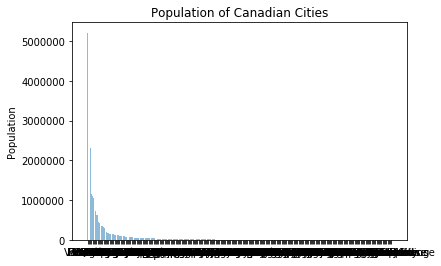

In [116]:
y_pos = np.arange(len(ca_cities_stats))

plt.bar(y_pos, ca_cities_stats[:]['population'], align='center', alpha=0.5)
plt.xticks(y_pos, ca_cities_stats[:]['city'])
plt.ylabel('Population')
plt.title('Population of Canadian Cities')
plt.show()

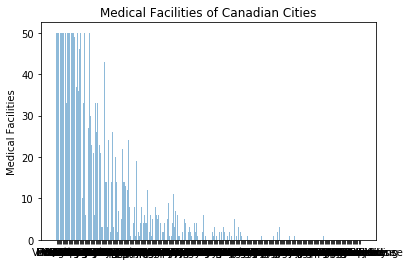

In [117]:
y_pos = np.arange(len(ca_cities_stats))

plt.bar(y_pos, ca_cities_stats[:]['medical'], align='center', alpha=0.5)
plt.xticks(y_pos, ca_cities_stats[:]['city'])
plt.ylabel('Medical Facilities')
plt.title('Medical Facilities of Canadian Cities')
plt.show()

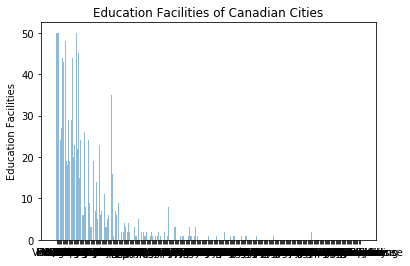

In [118]:
y_pos = np.arange(len(ca_cities_stats))

plt.bar(y_pos, ca_cities_stats[:]['education'], align='center', alpha=0.5)
plt.xticks(y_pos, ca_cities_stats[:]['city'])
plt.ylabel('Education Facilities')
plt.title('Education Facilities of Canadian Cities')
plt.show()

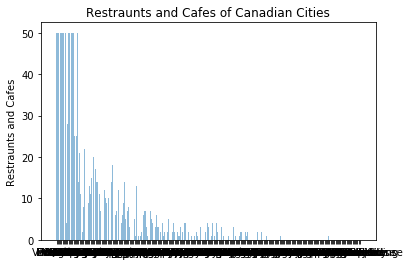

In [119]:
y_pos = np.arange(len(ca_cities_stats))

plt.bar(y_pos, ca_cities_stats[:]['food'], align='center', alpha=0.5)
plt.xticks(y_pos, ca_cities_stats[:]['city'])
plt.ylabel('Restraunts and Cafes')
plt.title('Restraunts and Cafes of Canadian Cities')
plt.show()

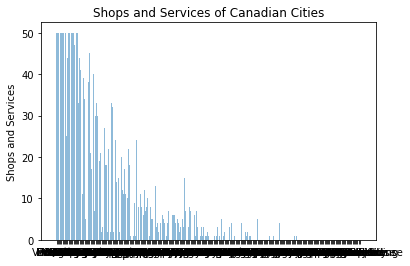

In [120]:
y_pos = np.arange(len(ca_cities_stats))

plt.bar(y_pos, ca_cities_stats[:]['shops'], align='center', alpha=0.5)
plt.xticks(y_pos, ca_cities_stats[:]['city'])
plt.ylabel('Shops and Services')
plt.title('Shops and Services of Canadian Cities')
plt.show()

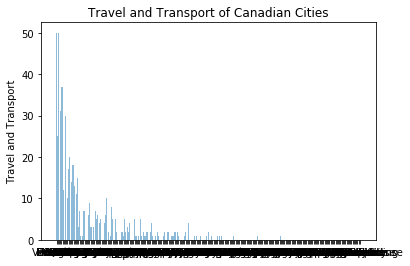

In [121]:
y_pos = np.arange(len(ca_cities_stats))

plt.bar(y_pos, ca_cities_stats[:]['transport'], align='center', alpha=0.5)
plt.xticks(y_pos, ca_cities_stats[:]['city'])
plt.ylabel('Travel and Transport')
plt.title('Travel and Transport of Canadian Cities')
plt.show()

In [144]:
#plot these cities on map
ca_cities_map = folium.Map(location=[55.585901, -105.750596], zoom_start=3) # generate map centred around Madhya Pradesh

# add cities
for lat, lng, label in zip(ca_cities_stats.lat, ca_cities_stats.lng, ca_cities_stats.city):
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        #popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(ca_cities_map)

# display map
ca_cities_map

In [127]:
ca_cities_stats.isnull().values.any()

False

In [128]:
ca_cities_stats

,city,lat,lng,admin_name,population,medical,education,food,shops,transport
0,Toronto,43.7000,-79.4200,Ontario,5213000.0,50.0,50.0,50.0,50.0,50.0
1,Montréal,45.5000,-73.5833,Québec,3678000.0,50.0,50.0,50.0,50.0,25.0
2,Vancouver,49.2734,-123.1216,British Columbia,2313328.0,50.0,50.0,50.0,50.0,50.0
3,Ottawa,45.4167,-75.7000,Ontario,1145000.0,50.0,24.0,50.0,50.0,31.0
4,Calgary,51.0830,-114.0800,Alberta,1110000.0,50.0,27.0,50.0,50.0,37.0
5,Edmonton,53.5500,-113.5000,Alberta,1058000.0,50.0,44.0,50.0,50.0,37.0
6,Hamilton,43.2500,-79.8300,Ontario,721053.0,50.0,43.0,50.0,50.0,12.0
7,Winnipeg,49.8830,-97.1660,Manitoba,632063.0,50.0,48.0,50.0,50.0,30.0
8,Québec,46.8400,-71.2456,Québec,624177.0,33.0,19.0,4.0,25.0,0.0
9,Oshawa,43.8800,-78.8500,Ontario,450963.0,50.0,18.0,28.0,44.0,10.0


In [134]:
#get feature set for kmeans 
X = np.array(ca_cities_stats.drop(['city','lat','lng','population','admin_name'], 1).astype(float))
X

array([[50., 50., 50., 50., 50.],
       [50., 50., 50., 50., 25.],
       [50., 50., 50., 50., 50.],
       ...,
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [135]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.18324607,  0.41884817,  0.73298429,  1.46073298,  0.30366492],
       [36.11111111, 18.55555556, 15.94444444, 36.        ,  5.77777778],
       [49.13333333, 36.6       , 48.33333333, 50.        , 25.66666667],
       [14.57692308,  4.15384615,  7.46153846, 15.80769231,  2.88461538]])

In [136]:
k_means_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3,
       1, 1, 0, 1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 0, 3,
       0, 1, 1, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [138]:
ca_cities_stats['tier']=k_means_labels
ca_cities_stats

,city,lat,lng,admin_name,population,medical,education,food,shops,transport,tier
0,Toronto,43.7000,-79.4200,Ontario,5213000.0,50.0,50.0,50.0,50.0,50.0,2
1,Montréal,45.5000,-73.5833,Québec,3678000.0,50.0,50.0,50.0,50.0,25.0,2
2,Vancouver,49.2734,-123.1216,British Columbia,2313328.0,50.0,50.0,50.0,50.0,50.0,2
3,Ottawa,45.4167,-75.7000,Ontario,1145000.0,50.0,24.0,50.0,50.0,31.0,2
4,Calgary,51.0830,-114.0800,Alberta,1110000.0,50.0,27.0,50.0,50.0,37.0,2
5,Edmonton,53.5500,-113.5000,Alberta,1058000.0,50.0,44.0,50.0,50.0,37.0,2
6,Hamilton,43.2500,-79.8300,Ontario,721053.0,50.0,43.0,50.0,50.0,12.0,2
7,Winnipeg,49.8830,-97.1660,Manitoba,632063.0,50.0,48.0,50.0,50.0,30.0,2
8,Québec,46.8400,-71.2456,Québec,624177.0,33.0,19.0,4.0,25.0,0.0,1
9,Oshawa,43.8800,-78.8500,Ontario,450963.0,50.0,18.0,28.0,44.0,10.0,1


In [161]:
ca_cities_map_labeled = folium.Map(location=[55.585901, -105.750596], zoom_start=3) # generate map centred around Madhya Pradesh
group0 = folium.FeatureGroup(name='Tier IV Cities')
group1 = folium.FeatureGroup(name='Group II Cities')
group2 = folium.FeatureGroup(name='Group I Cities')
group3 = folium.FeatureGroup(name='Group III Cities')
# add cities
for lat, lng, label, tier in zip(ca_cities_stats.lat, ca_cities_stats.lng, ca_cities_stats.city, ca_cities_stats.tier):
    if tier==0:
        folium.CircleMarker(
            [lat, lng],
            radius=1,
            #popup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
            ).add_to(group0)
    elif tier==1:
        folium.CircleMarker(
            [lat, lng],
            radius=1,
            #popup=label,
            fill=True,
            color='green',
            fill_color='green',
            fill_opacity=0.6
            ).add_to(group1)
    elif tier==2:
        folium.CircleMarker(
            [lat, lng],
            radius=1,
            #popup=label,
            fill=True,
            color='red',
            fill_color='red',
            fill_opacity=0.6
            ).add_to(group2)
    elif tier==3:
        folium.CircleMarker(
            [lat, lng],
            radius=1,
            #popup=label,
            fill=True,
            color='yellow',
            fill_color='yellow',
            fill_opacity=0.6
            ).add_to(group3)
        

group1.add_to(ca_cities_map_labeled)
group2.add_to(ca_cities_map_labeled)
group3.add_to(ca_cities_map_labeled)
group0.add_to(ca_cities_map_labeled)
folium.map.LayerControl('topright', collapsed=False).add_to(ca_cities_map_labeled)

# display map
ca_cities_map_labeled

In [165]:
#Group I Cities
tier1=ca_cities_stats[ca_cities_stats[:]['tier']==2]
tier1

,city,lat,lng,admin_name,population,medical,education,food,shops,transport,tier
0,Toronto,43.7000,-79.4200,Ontario,5213000.0,50.0,50.0,50.0,50.0,50.0,2
1,Montréal,45.5000,-73.5833,Québec,3678000.0,50.0,50.0,50.0,50.0,25.0,2
2,Vancouver,49.2734,-123.1216,British Columbia,2313328.0,50.0,50.0,50.0,50.0,50.0,2
3,Ottawa,45.4167,-75.7000,Ontario,1145000.0,50.0,24.0,50.0,50.0,31.0,2
4,Calgary,51.0830,-114.0800,Alberta,1110000.0,50.0,27.0,50.0,50.0,37.0,2
5,Edmonton,53.5500,-113.5000,Alberta,1058000.0,50.0,44.0,50.0,50.0,37.0,2
6,Hamilton,43.2500,-79.8300,Ontario,721053.0,50.0,43.0,50.0,50.0,12.0,2
7,Winnipeg,49.8830,-97.1660,Manitoba,632063.0,50.0,48.0,50.0,50.0,30.0,2
10,Kitchener,43.4500,-80.5000,Ontario,417001.0,50.0,29.0,50.0,50.0,17.0,2
11,Halifax,44.6500,-63.6000,Nova Scotia,359111.0,50.0,19.0,50.0,50.0,20.0,2


In [166]:
#Group II Cities
tier2=ca_cities_stats[ca_cities_stats[:]['tier']==1]
tier2

,city,lat,lng,admin_name,population,medical,education,food,shops,transport,tier
8,Québec,46.8400,-71.2456,Québec,624177.0,33.0,19.0,4.0,25.0,0.0,1
9,Oshawa,43.8800,-78.8500,Ontario,450963.0,50.0,18.0,28.0,44.0,10.0,1
15,Saskatoon,52.1700,-106.6700,Saskatchewan,198958.0,49.0,23.0,25.0,47.0,13.0,1
18,Sudbury,46.5000,-80.9666,Ontario,157857.0,36.0,45.0,14.0,33.0,3.0,1
19,Abbotsford,49.0504,-122.3000,British Columbia,151683.0,46.0,15.0,21.0,44.0,7.0,1
20,Sarnia,42.9666,-82.4000,Ontario,144172.0,50.0,24.0,11.0,41.0,1.0,1
22,St. John's,47.5850,-52.6810,Newfoundland and Labrador,131469.0,33.0,6.0,8.0,39.0,7.0,1
23,Kelowna,49.9000,-119.4833,British Columbia,125109.0,50.0,26.0,22.0,34.0,7.0,1
25,Kingston,44.2337,-76.4833,Ontario,114195.0,30.0,18.0,23.0,33.0,3.0,1
26,Thunder Bay,48.4462,-89.2750,Ontario,99334.0,27.0,24.0,9.0,38.0,6.0,1


In [167]:
#Group III Cities
tier3=ca_cities_stats[ca_cities_stats[:]['tier']==3]
tier3

,city,lat,lng,admin_name,population,medical,education,food,shops,transport,tier
21,Sherbrooke,45.4000,-71.9000,Québec,139652.0,10.0,6.0,2.0,11.0,1.0,3
28,Saint John,45.2670,-66.0767,New Brunswick,87857.0,30.0,3.0,11.0,21.0,3.0,3
29,Nanaimo,49.1460,-123.9343,British Columbia,84905.0,23.0,3.0,15.0,17.0,3.0,3
35,Prince George,53.9167,-122.7667,British Columbia,65558.0,23.0,23.0,11.0,19.0,4.0,3
36,Medicine Hat,50.0333,-110.6833,Alberta,63138.0,21.0,6.0,7.0,21.0,5.0,3
40,Chilliwack,49.1666,-121.9500,British Columbia,51942.0,14.0,3.0,10.0,18.0,6.0,3
41,North Bay,46.3000,-79.4500,Ontario,50170.0,14.0,3.0,9.0,18.0,10.0,3
43,Cornwall,45.0171,-74.7333,Ontario,48821.0,24.0,6.0,10.0,22.0,2.0,3
48,Grand Prairie,55.1666,-118.8000,Alberta,41462.0,20.0,7.0,6.0,24.0,5.0,3
49,Penticton,49.5004,-119.5833,British Columbia,37721.0,14.0,6.0,7.0,14.0,2.0,3


In [168]:
# Group IV Cities
tier4=ca_cities_stats[ca_cities_stats[:]['tier']==0]
tier4

,city,lat,lng,admin_name,population,medical,education,food,shops,transport,tier
24,Trois-Rivières,46.3500,-72.5499,Québec,119693.0,6.0,8.0,0.0,5.0,0.0,0
31,St.-Jerome,45.7666,-74.0000,Québec,78439.0,6.0,0.0,0.0,7.0,0.0,0
37,Drummondville,45.8833,-72.4834,Québec,59489.0,3.0,7.0,0.0,2.0,0.0,0
38,Chicoutimi,48.4333,-71.0667,Québec,53940.0,3.0,0.0,0.0,3.0,0.0,0
42,Shawinigan,46.5504,-72.7333,Québec,49161.0,3.0,5.0,0.0,2.0,0.0,0
44,Joliette,46.0333,-73.4333,Québec,45361.0,2.0,0.0,0.0,2.0,1.0,0
47,Victoriaville,46.0504,-71.9667,Québec,41500.0,3.0,1.0,0.0,2.0,0.0,0
50,Sydney,46.0661,-60.1800,Nova Scotia,37538.0,2.0,0.0,0.0,0.0,0.0,0
52,Rimouski,48.4337,-68.5167,Québec,35584.0,0.0,0.0,0.0,2.0,0.0,0
61,Saint-Georges,46.1171,-70.6667,Québec,26149.0,1.0,0.0,0.0,1.0,0.0,0


In [169]:
#stats of the cities tierwise
stat_1=['Tier 1',(tier1[:]['population']).mean(),(tier1[:]['medical']).mean(),(tier1[:]['education']).mean(),
        (tier1[:]['food']).mean(),(tier1[:]['shops']).mean(),(tier1[:]['transport']).mean()]
stat_2=['Tier 2',(tier2[:]['population']).mean(),(tier2[:]['medical']).mean(),(tier2[:]['education']).mean(),
        (tier2[:]['food']).mean(),(tier2[:]['shops']).mean(),(tier2[:]['transport']).mean()]
stat_3=['Tier 3',(tier3[:]['population']).mean(),(tier3[:]['medical']).mean(),(tier3[:]['education']).mean(),
        (tier3[:]['food']).mean(),(tier3[:]['shops']).mean(),(tier3[:]['transport']).mean()]
stat_4=['Tier 4',(tier4[:]['population']).mean(),(tier4[:]['medical']).mean(),(tier4[:]['education']).mean(),
        (tier4[:]['food']).mean(),(tier4[:]['shops']).mean(),(tier4[:]['transport']).mean()]

In [170]:

tier_stats=pd.DataFrame(columns=['Tier','Avg_Population','Avg_Medical','Avg_Education','Avg_Food','Avg_Shops','Avg_Transport'])
tier_stats.loc[0,:]=stat_1
tier_stats.loc[1,:]=stat_2
tier_stats.loc[2,:]=stat_3
tier_stats.loc[3,:]=stat_4

In [171]:
tier_stats.set_index('Tier')

,Avg_Population,Avg_Medical,Avg_Education,Avg_Food,Avg_Shops,Avg_Transport
Tier,,,,,,
Tier 1,1.19736e+06,49.1333,36.6,48.3333,50,25.6667
Tier 2,151394,36.1111,18.5556,15.9444,36,5.77778
Tier 3,41518.3,14.5769,4.15385,7.46154,15.8077,2.88462
Tier 4,7204.31,1.18325,0.418848,0.732984,1.46073,0.303665


In [173]:
tier_stats['Avg_Population'] = tier_stats.Avg_Population.astype(int)
tier_stats['Avg_Medical'] = tier_stats.Avg_Medical.astype(int)
tier_stats['Avg_Education'] = tier_stats.Avg_Education.astype(int)
tier_stats['Avg_Food'] = tier_stats.Avg_Food.astype(int)
tier_stats['Avg_Shops'] = tier_stats.Avg_Shops.astype(int)
tier_stats['Avg_Transport'] = tier_stats.Avg_Transport.astype(int)

In [174]:

#Stats of each tier
tier_stats

,Tier,Avg_Population,Avg_Medical,Avg_Education,Avg_Food,Avg_Shops,Avg_Transport
0,Tier 1,1197361,49,36,48,50,25
1,Tier 2,151394,36,18,15,36,5
2,Tier 3,41518,14,4,7,15,2
3,Tier 4,7204,1,0,0,1,0
